In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics.cluster import adjusted_rand_score
import random

In [2]:
df = pd.read_csv('wine.data.csv')

In [3]:
label = df["Label"]
del df["Label"]
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


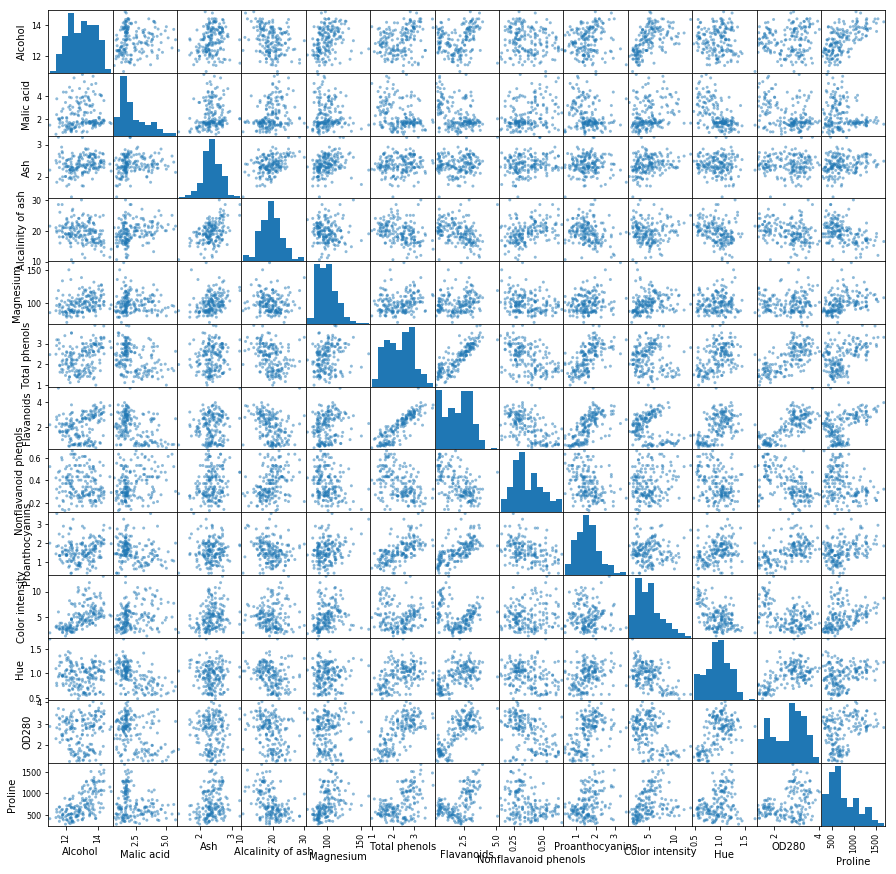

In [4]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

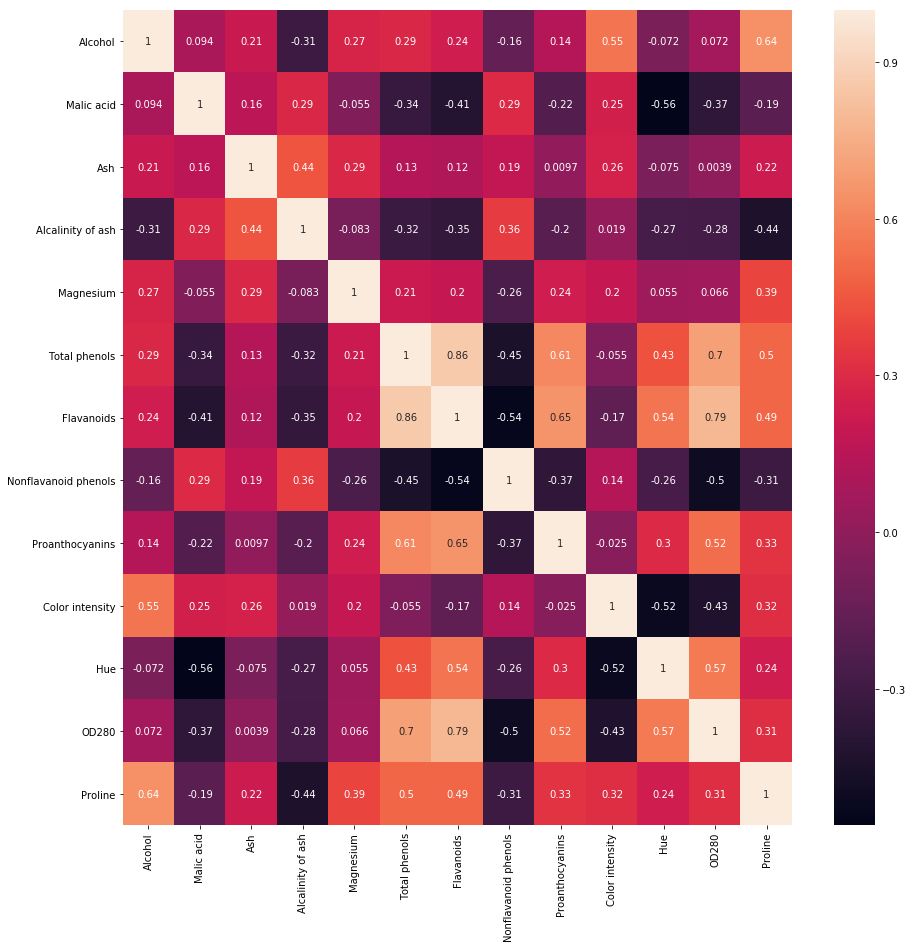

In [5]:
matrix = df.corr()
plt.figure(figsize = (15,15))
sn.heatmap(matrix, annot=True)
plt.show()

In [6]:
standardScaler = sk.preprocessing.StandardScaler()
standardScaler.fit(df)
X_scaled_array = standardScaler.transform(df)
normalizedData = pd.DataFrame(X_scaled_array, columns = df.columns)

C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Connor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
seed = random.seed()
kMeansClustering = KMeans(n_clusters = 3, random_state=seed)
res = kMeansClustering.fit_predict(normalizedData)

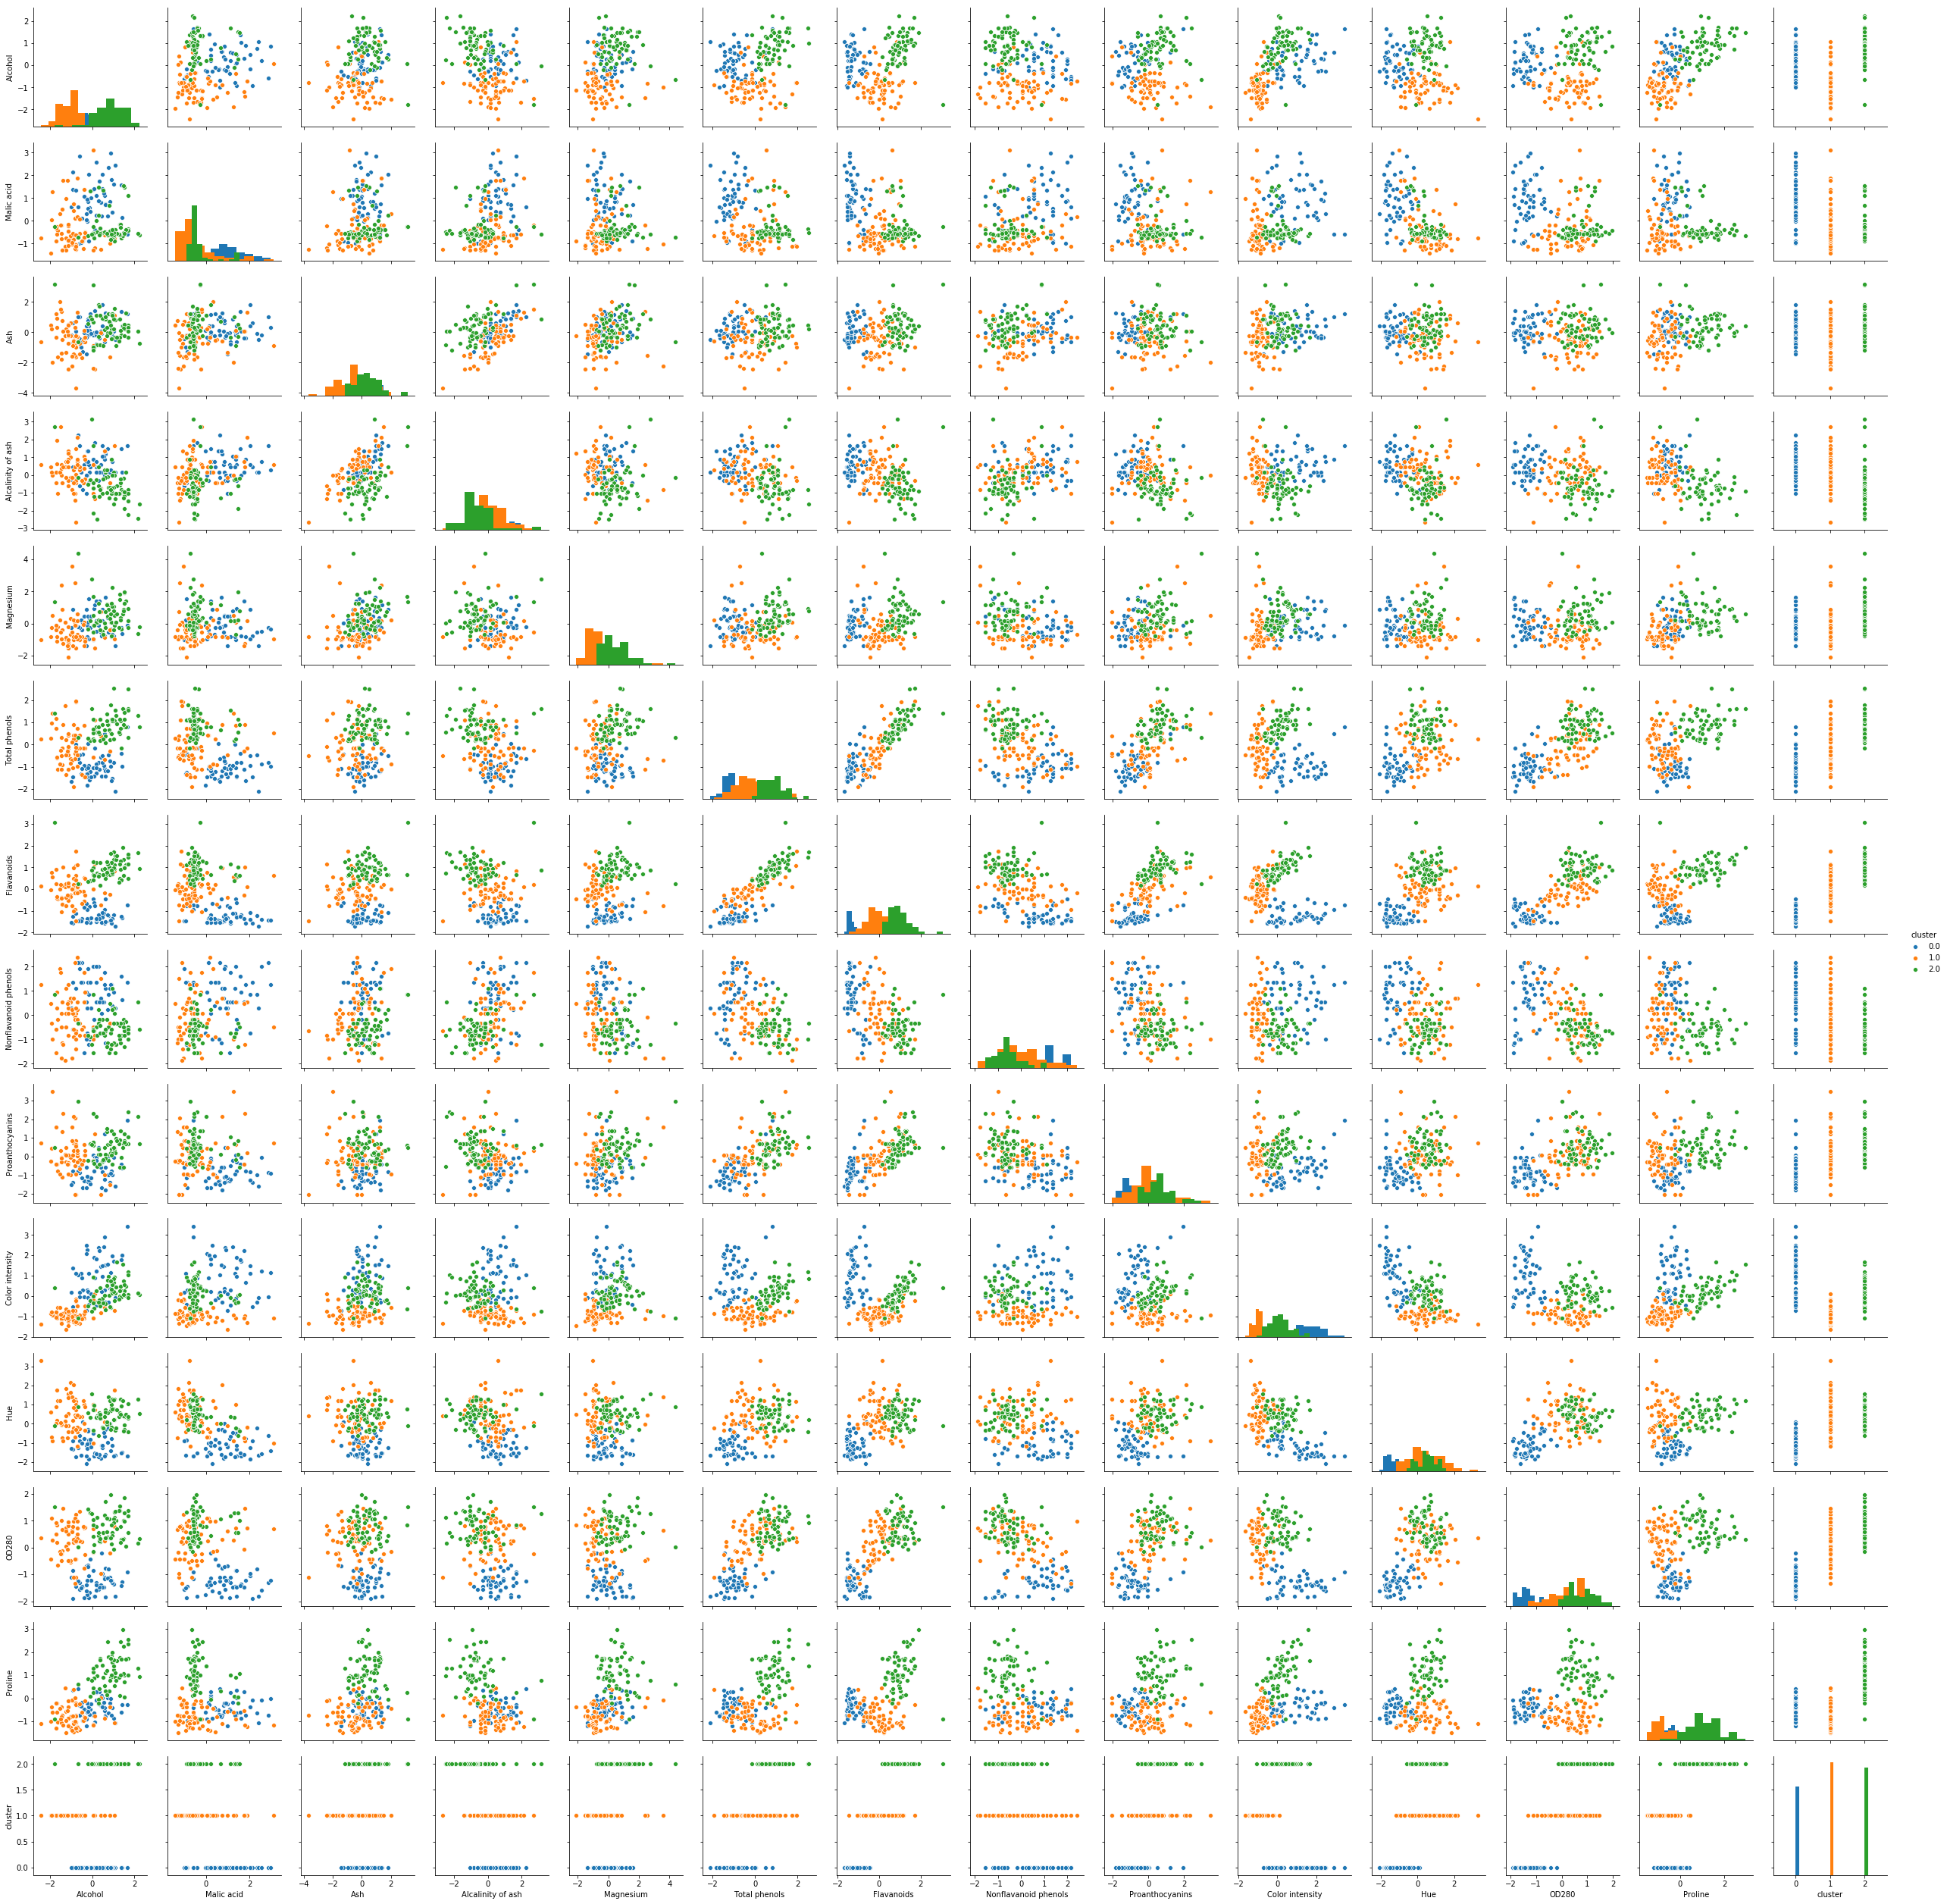

In [8]:
label_pred_KM = kMeansClustering.labels_
normalizedData ["cluster"] = label_pred_KM.astype('float64')
sn_plot = sn.pairplot(normalizedData, hue = "cluster",diag_kind="hist")

In [9]:
pca = sklearnPCA(n_components=6)
transformed = pd.DataFrame(pca.fit_transform(normalizedData))

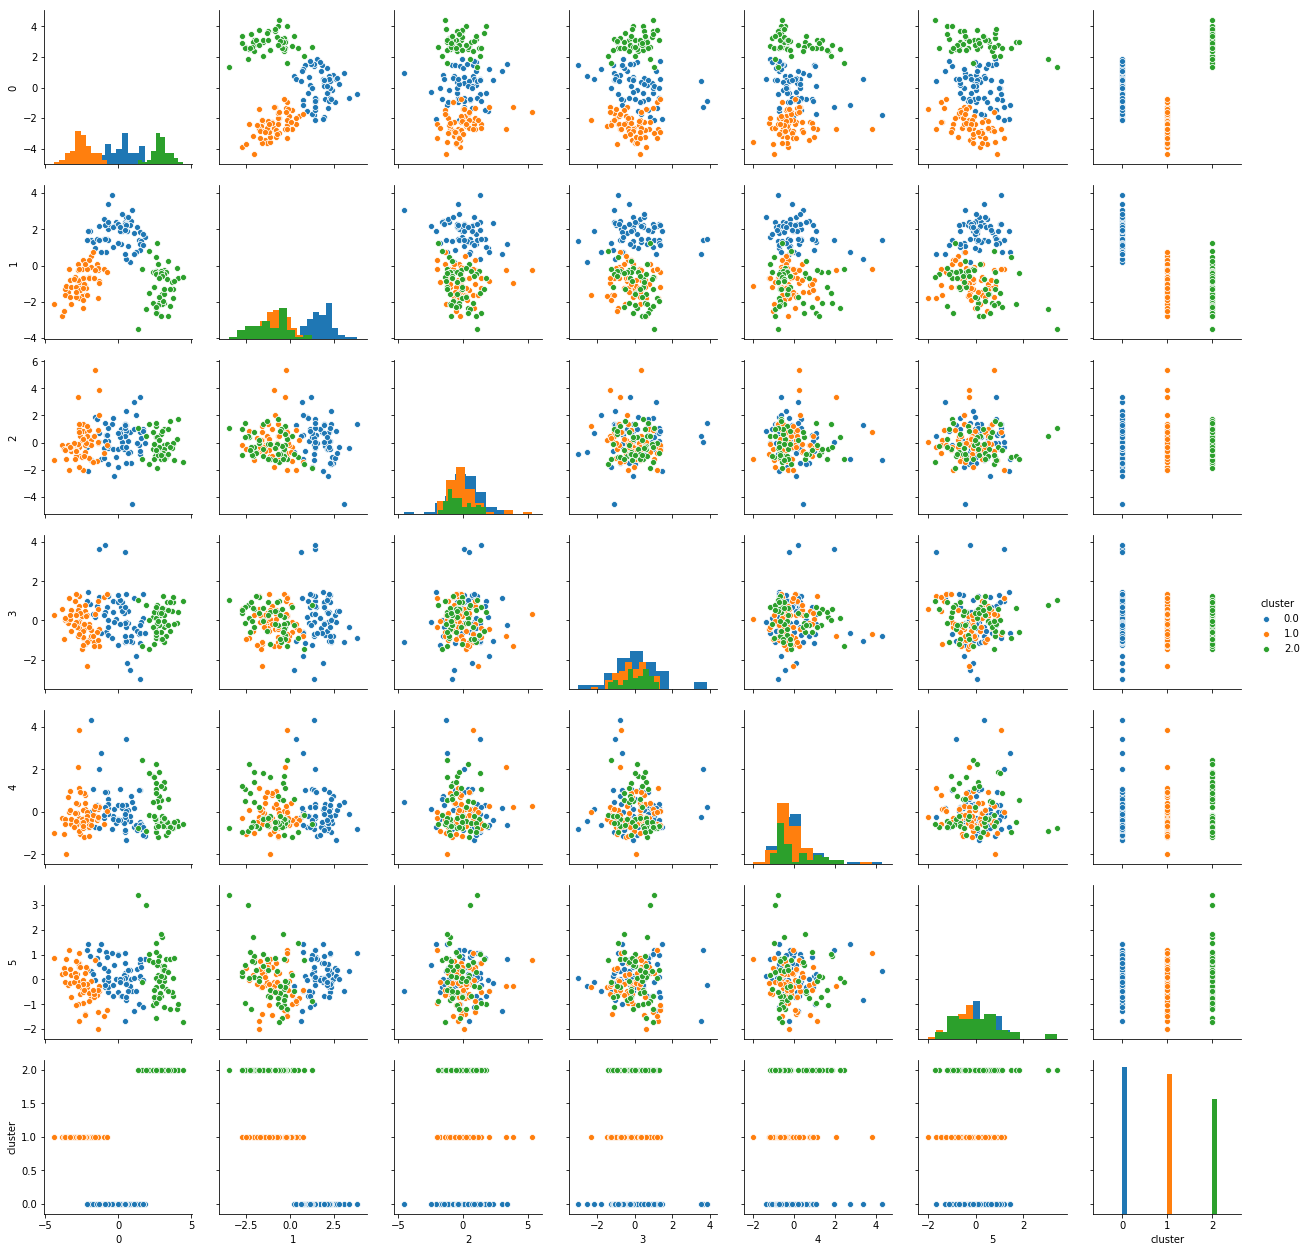

In [10]:
res = kMeansClustering.fit_predict(transformed)
label_pred_KM_PCA = kMeansClustering.labels_
transformed ["cluster"] = label_pred_KM_PCA.astype('float64')
sn_plot = sn.pairplot(transformed, hue = "cluster",diag_kind="hist")

In [11]:
normal_score = adjusted_rand_score(label, label_pred_KM)
pca_score = adjusted_rand_score(label, label_pred_KM_PCA)

print(normal_score)
print(pca_score)

0.8974949815093207
0.8974949815093207
